In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import metrics, model_selection
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### MERGE DATAFRAMES

In [8]:
passengerId = test_df['PassengerId']

titanic_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [9]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
train_df_index = len(train_df)
test_df_index = len(titanic_df) - len(test_df)

In [11]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
df = pd.DataFrame()

Number of unique values in Survived: 2
Unique values in Survived: [ 0.  1. nan]
Number of null values in Survived: 418
Value counts in Survived:
Survived
0.0    549
1.0    342
Name: count, dtype: int64


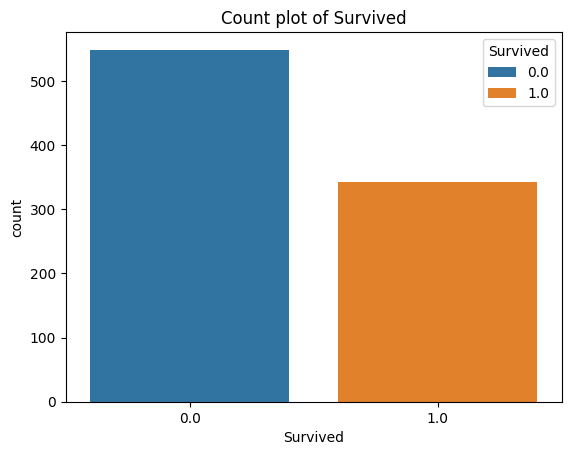

In [13]:
def titanic_fun(data, column, count = True):
    print(f"Number of unique values in {column}: {data[column].nunique()}")
    print(f"Unique values in {column}: {data[column].unique()}")
    print(f"Number of null values in {column}: {data[column].isnull().sum()}")
    print(f"Value counts in {column}:\n{data[column].value_counts()}")
    
    if count:
        sns.countplot(x=column, data=data, hue='Survived')
        plt.title(f"Count plot of {column}")
        plt.show()
    else:
        sns.displot(data[column], kde=True, multiple='stack')
        plt.title(f"Distribution of {column}")
        
titanic_fun(titanic_df, 'Survived')

In [14]:
df['Survived'] = titanic_df['Survived']

### P_CLASS

Number of unique values in Pclass: 3
Unique values in Pclass: [3 1 2]
Number of null values in Pclass: 0
Value counts in Pclass:
Pclass
3    709
1    323
2    277
Name: count, dtype: int64


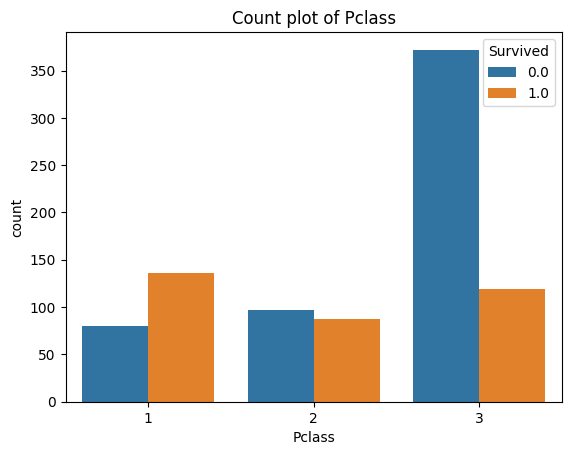

In [15]:
titanic_fun(titanic_df, 'Pclass')

In [16]:
df['Pclass'] = titanic_df['Pclass']

### SEX

Number of unique values in Sex: 2
Unique values in Sex: ['male' 'female']
Number of null values in Sex: 0
Value counts in Sex:
Sex
male      843
female    466
Name: count, dtype: int64


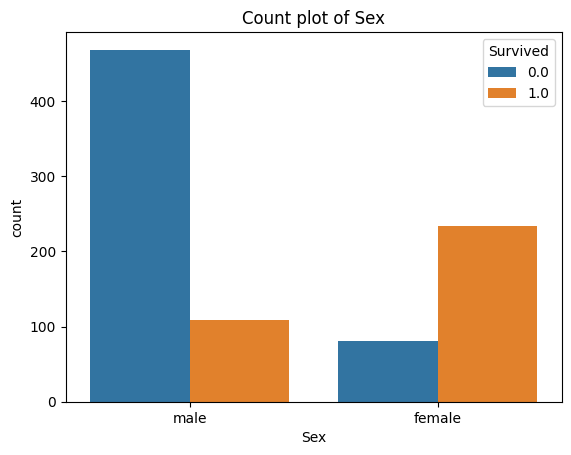

In [17]:
titanic_fun(titanic_df, 'Sex')

In [18]:
df['Sex'] = titanic_df['Sex']

### Age

Number of unique values in Age: 98
Unique values in Age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
Number of null values in Age: 263
Value counts in Age:
Age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
60.50     1
11.50     1
0.33      1
0.17      1
38.50     1
Name: count, Length: 98, dtype: int64


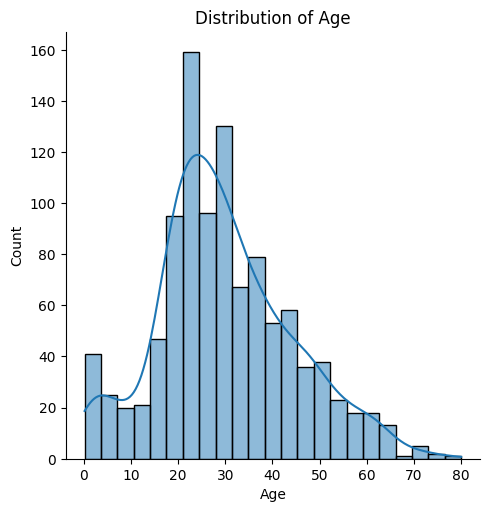

In [19]:
titanic_fun(titanic_df, 'Age', False)

<Axes: >

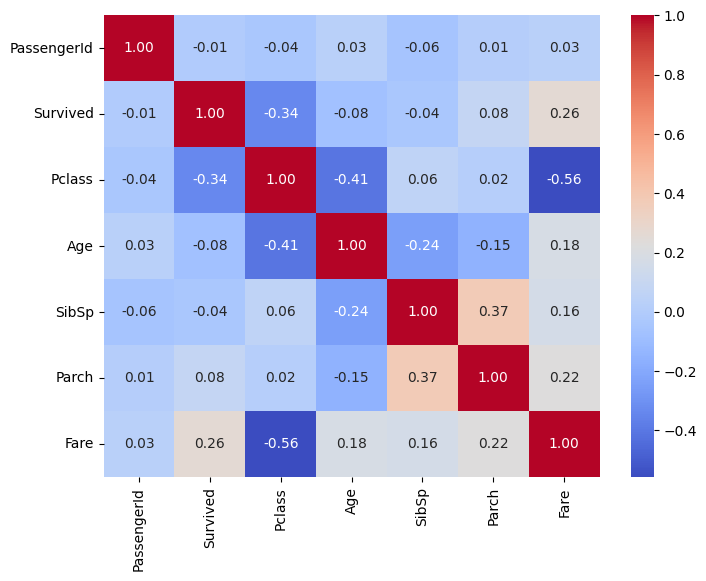

In [20]:
correlation_matrix = titanic_df.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [21]:
for i in sorted(titanic_df['Pclass'].unique()):
    print(f"Mean age for Pclass {i}: {titanic_df[titanic_df['Pclass'] == i]['Age'].mean():.2f}")

Mean age for Pclass 1: 39.16
Mean age for Pclass 2: 29.51
Mean age for Pclass 3: 24.82


In [22]:
for i in titanic_df.index:
    if pd.isnull(titanic_df.loc[i, 'Age']):
        if titanic_df['Pclass'][i] == 1:
            titanic_df.loc[i, 'Age'] = titanic_df[titanic_df['Pclass'] == 1]['Age'].mean()
        elif titanic_df['Pclass'][i] == 2:
            titanic_df.loc[i, 'Age'] = titanic_df[titanic_df['Pclass'] == 2]['Age'].mean()
        elif titanic_df['Pclass'][i] == 3:
            titanic_df.loc[i, 'Age'] = titanic_df[titanic_df['Pclass'] == 3]['Age'].mean()
    else:
        continue

In [23]:
titanic_df['Age_Cut'] = pd.qcut(titanic_df['Age'], 8)

In [24]:
titanic_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

C:\Users\pedro\AppData\Local\Temp\ipykernel_1668\227062102.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.169, 18.0]",0.503597
1,"(18.0, 22.0]",0.304348
2,"(22.0, 24.816]",0.296774
3,"(24.816, 26.0]",0.289855
4,"(26.0, 30.0]",0.396040
5,"(30.0, 37.0]",0.452991
6,"(37.0, 45.0]",0.408696
7,"(45.0, 80.0]",0.368932


In [25]:
titanic_df.loc[titanic_df['Age'] <= 18, 'Age'] = 0
titanic_df.loc[(titanic_df['Age'] > 18) & (titanic_df['Age'] <= 22), 'Age'] = 1
titanic_df.loc[(titanic_df['Age'] > 22) & (titanic_df['Age'] <= 25), 'Age'] = 2
titanic_df.loc[(titanic_df['Age'] > 25) & (titanic_df['Age'] <= 26), 'Age'] = 3
titanic_df.loc[(titanic_df['Age'] > 26) & (titanic_df['Age'] <= 30), 'Age'] = 4
titanic_df.loc[(titanic_df['Age'] > 30) & (titanic_df['Age'] <= 37), 'Age'] = 5
titanic_df.loc[(titanic_df['Age'] > 37) & (titanic_df['Age'] <= 45), 'Age'] = 6
titanic_df.loc[(titanic_df['Age'] > 45) & (titanic_df['Age'] <= 80), 'Age'] = 7
titanic_df.loc[(titanic_df['Age'] > 80), 'Age']

Series([], Name: Age, dtype: float64)

In [26]:
df['Age'] = titanic_df['Age']

### FAMILY

In [27]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [28]:
FamilySize_mapping = {
    1: 'Single',
    2: 'Small',
    3: 'Small',
    4: 'Medium',
    5: 'Medium',
    6: 'Large',
    7: 'Large',
    8: 'Large',
    11: 'Large'
}

In [29]:
titanic_df['FamilySize_Grouped'] = titanic_df['FamilySize'].map(FamilySize_mapping)

Number of unique values in FamilySize_Grouped: 4
Unique values in FamilySize_Grouped: ['Small' 'Single' 'Medium' 'Large']
Number of null values in FamilySize_Grouped: 0
Value counts in FamilySize_Grouped:
FamilySize_Grouped
Single    790
Small     394
Medium     65
Large      60
Name: count, dtype: int64


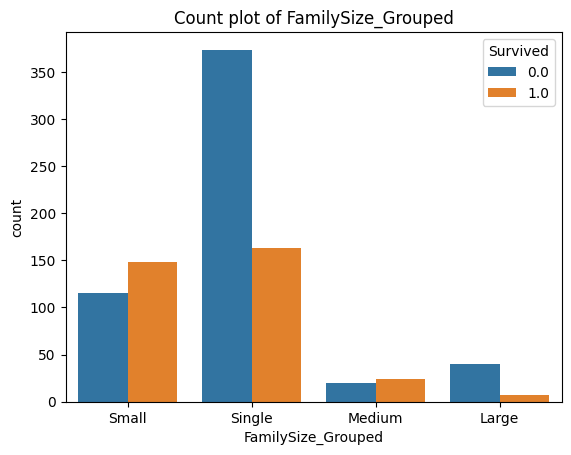

In [30]:
titanic_fun(titanic_df, 'FamilySize_Grouped')

In [31]:
df['FamilySize_Grouped'] = titanic_df['FamilySize_Grouped']

### FARE

In [32]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cut,FamilySize,FamilySize_Grouped
1043,1044,NaN,3,"Storey, Mr. Thomas",male,7.0,0,0,3701,NaN,NaN,S,"(45.0, 80.0]",1,Single


In [33]:
titanic_df['Fare'].fillna(0, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_1668\2494889762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Fare'].fillna(0, inplace=True)


In [34]:
titanic_df.loc[1043, 'Fare']

np.float64(0.0)

In [35]:
titanic_df['Fare_Cut'] = pd.qcut(titanic_df['Fare'], 6)
titanic_df['Fare_Cut'] = pd.qcut(titanic_df['Fare'], 6)

In [36]:
titanic_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\pedro\AppData\Local\Temp\ipykernel_1668\4147042454.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 53.1]",0.435065
5,"(53.1, 512.329]",0.695035


In [37]:
titanic_df.loc[titanic_df['Fare'] <= 7.775, 'Fare'] = 0
titanic_df.loc[(titanic_df['Fare'] > 7.775) & (titanic_df['Fare'] <= 8.662), 'Fare'] = 1
titanic_df.loc[(titanic_df['Fare'] > 8.662) & (titanic_df['Fare'] <= 14.454), 'Fare'] = 2
titanic_df.loc[(titanic_df['Fare'] > 14.454) & (titanic_df['Fare'] <= 26), 'Fare'] = 3
titanic_df.loc[(titanic_df['Fare'] > 26) & (titanic_df['Fare'] <= 53.1), 'Fare'] = 4
titanic_df.loc[(titanic_df['Fare'] > 53.1) & (titanic_df['Fare'] <= 512.329), 'Fare'] = 5
titanic_df.loc[(titanic_df['Fare'] > 512.329), 'Fare']

258     512.3292
679     512.3292
737     512.3292
1234    512.3292
Name: Fare, dtype: float64

In [38]:
df['Fare'] = titanic_df['Fare']

### CABIN

In [39]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('U')
titanic_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in titanic_df['Cabin']])

In [40]:
titanic_df['Cabin_Assigned'] = titanic_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

Number of unique values in Cabin_Assigned: 2
Unique values in Cabin_Assigned: [0 1]
Number of null values in Cabin_Assigned: 0
Value counts in Cabin_Assigned:
Cabin_Assigned
0    1014
1     295
Name: count, dtype: int64


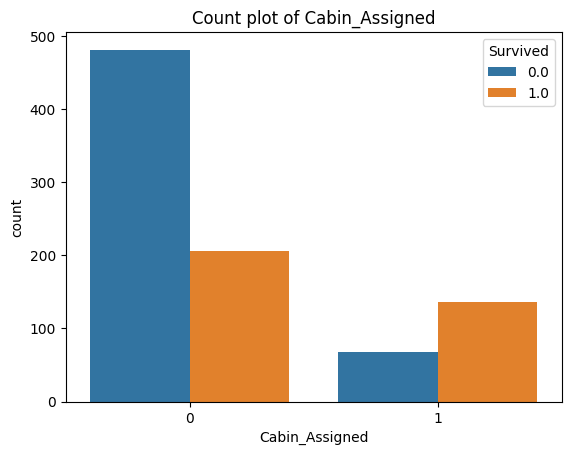

In [41]:
titanic_fun(titanic_df, 'Cabin_Assigned')

In [42]:
df['Cabin_Assigned'] = titanic_df['Cabin_Assigned']

### EMBARKED

In [43]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cut,FamilySize,FamilySize_Grouped,Fare_Cut,Cabin_Assigned
61,62,1.0,1,"Icard, Miss. Amelie",female,6.0,0,0,113572,5.0,B,NaN,"(37.0, 45.0]",1,Single,"(53.1, 512.329]",1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,7.0,0,0,113572,5.0,B,NaN,"(45.0, 80.0]",1,Single,"(53.1, 512.329]",1


In [44]:
titanic_df[titanic_df['Embarked'] == 'C']['Pclass'].mean()

np.float64(1.8518518518518519)

In [45]:
titanic_df['Embarked'].fillna('C', inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_1668\2783934021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna('C', inplace=True)


Number of unique values in Embarked: 3
Unique values in Embarked: ['S' 'C' 'Q']
Number of null values in Embarked: 0
Value counts in Embarked:
Embarked
S    914
C    272
Q    123
Name: count, dtype: int64


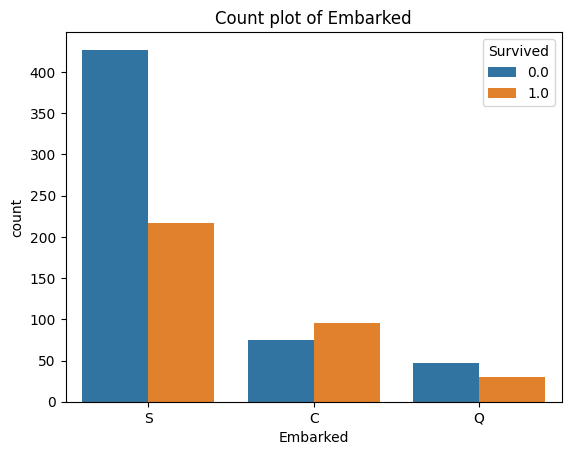

In [46]:
titanic_fun(titanic_df, 'Embarked')

In [47]:
df['Embarked'] = titanic_df['Embarked']

### NAME

In [48]:
titanic_df['Title'] = titanic_df['Name'].str.split(pat=", ", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x: x.strip())

titanic_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dona,NaN
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [49]:
titanic_df['Title'] = titanic_df['Title'].replace({
    'Capt': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Jonkheer': 'Royalty',
    'Sir': 'Royalty',
    'Don': 'Royalty',
    'Lady': 'Royalty',
    'the Countess': 'Royalty',
    'Dona': 'Royalty',
    'Mme': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Mr': 'Mr',
    'Master': 'Master',
    'Other': 'Other'
})

In [50]:
titanic_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Master,40,0.575000
1,Miss,185,0.702703
2,Mr,517,0.156673
3,Mrs,126,0.793651
4,Officer,18,0.277778
5,Royalty,5,0.600000


In [51]:
df['Title'] = titanic_df['Title']

In [52]:
titanic_df['Name_Length'] = titanic_df['Name'].apply(lambda x: len(x))

titanic_df['Name_Length'].describe()

count    1309.000000
mean       27.130634
std         9.506503
min        12.000000
25%        20.000000
50%        25.000000
75%        30.000000
max        82.000000
Name: Name_Length, dtype: float64

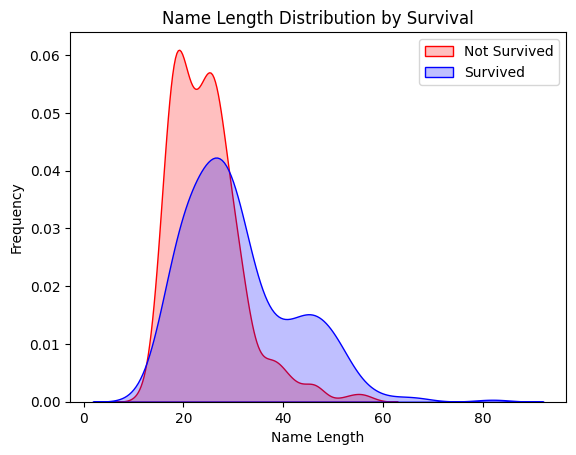

In [53]:
g = sns.kdeplot(titanic_df['Name_Length'][(titanic_df['Survived'] == 0) & (titanic_df['Name_Length'].notnull())], color='red', fill=True)
g = sns.kdeplot(titanic_df['Name_Length'][(titanic_df['Survived'] == 1) & (titanic_df['Name_Length'].notnull())], ax=g, color='blue', fill=True)

g.set_title('Name Length Distribution by Survival')
g.set_xlabel('Name Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])
plt.show()

In [54]:
titanic_df['Name_LengthGB'] = pd.qcut(titanic_df['Name_Length'], 8)

In [55]:
titanic_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

C:\Users\pedro\AppData\Local\Temp\ipykernel_1668\2987670837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.0]",0.292929
5,"(27.0, 30.0]",0.428571
6,"(30.0, 39.0]",0.512000
7,"(39.0, 82.0]",0.773196


In [56]:
titanic_df.loc[titanic_df['Name_Length'] <= 12, 'Name_Size'] = 0
titanic_df.loc[(titanic_df['Name_Length'] > 12) & (titanic_df['Name_Length'] <= 18), 'Name_Size'] = 1
titanic_df.loc[(titanic_df['Name_Length'] > 18) & (titanic_df['Name_Length'] <= 20), 'Name_Size'] = 2
titanic_df.loc[(titanic_df['Name_Length'] > 20) & (titanic_df['Name_Length'] <= 23), 'Name_Size'] = 3
titanic_df.loc[(titanic_df['Name_Length'] > 23) & (titanic_df['Name_Length'] <= 25), 'Name_Size'] = 4
titanic_df.loc[(titanic_df['Name_Length'] > 25) & (titanic_df['Name_Length'] <= 27), 'Name_Size'] = 5
titanic_df.loc[(titanic_df['Name_Length'] > 27) & (titanic_df['Name_Length'] <= 30), 'Name_Size'] = 6
titanic_df.loc[(titanic_df['Name_Length'] > 30) & (titanic_df['Name_Length'] <= 39), 'Name_Size'] = 7
titanic_df.loc[(titanic_df['Name_Length'] > 39) & (titanic_df['Name_Length'] <= 82), 'Name_Size'] = 8
titanic_df.loc[(titanic_df['Name_Length'] > 82), 'Name_Size']


Series([], Name: Name_Size, dtype: float64)

In [57]:
df['Name_Size'] = titanic_df['Name_Size']

### TICKET

In [58]:
titanic_df['TicketNumber'] = titanic_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [59]:
titanic_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
127,1601,7,0.714286
255,2343,7,0.000000
638,347082,7,0.000000
643,347088,6,0.000000
479,3101295,6,0.000000
...,...,...,...
29,113038,0,NaN
31,113044,0,NaN
34,113054,0,NaN
4,110469,0,NaN


In [60]:
titanic_df['TicketNumberCounts'] = titanic_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [61]:
titanic_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,476,0.264706
1,2,183,0.513661
2,3,102,0.666667
3,4,46,0.717391
6,7,24,0.208333
4,5,21,0.333333
5,6,19,0.210526
7,8,13,0.384615
8,11,7,0.000000


In [62]:
TicketNumber_mapping = {
    1: 'Single',
    2: 'Medium',
    3: 'Medium',
    4: 'Medium',
    5: 'Large',
    6: 'Large',
    7: 'Large',
    8: 'Large',
    11: 'Large',
}
titanic_df['TicketNumber_Grouped'] = titanic_df['TicketNumberCounts'].map(TicketNumber_mapping)

Number of unique values in TicketNumber_Grouped: 3
Unique values in TicketNumber_Grouped: ['Single' 'Medium' 'Large']
Number of null values in TicketNumber_Grouped: 0
Value counts in TicketNumber_Grouped:
TicketNumber_Grouped
Single    705
Medium    483
Large     121
Name: count, dtype: int64


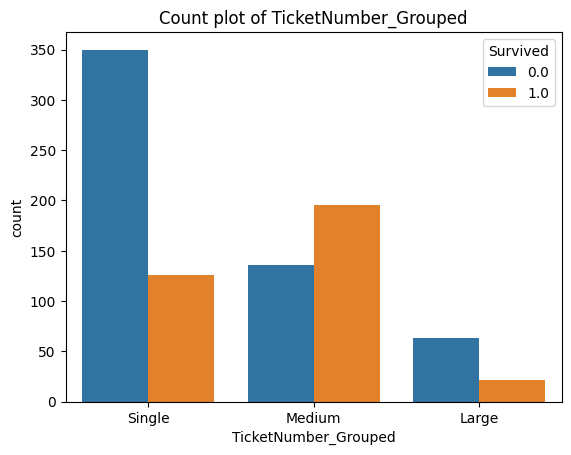

In [63]:
titanic_fun(titanic_df, 'TicketNumber_Grouped')

In [64]:
df['TicketNumber_Grouped'] = titanic_df['TicketNumber_Grouped']

### PREPARING DATA FOR PROCESSING

In [65]:
train = df[:train_df_index].copy()
test = df[train_df_index:].copy()

In [66]:
sizes = ['Single', 'Small', 'Medium', 'Large']

In [67]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder()

In [68]:
ct = make_column_transformer(
    (ohe, ['Sex', 'Embarked', 'Title']),
    (ode, ['FamilySize_Grouped', 'TicketNumber_Grouped']),
    remainder = 'passthrough'
)

In [69]:
ct.set_output(transform="pandas")

,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [70]:
X = train.drop('Survived', axis=1)
Y = train['Survived']
X_test = test.drop('Survived', axis=1)

In [71]:
train_transformed = ct.fit_transform(X)
test_transformed = ct.fit_transform(X_test)

In [72]:
train_transformed

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Title_Master,onehotencoder__Title_Miss,onehotencoder__Title_Mr,onehotencoder__Title_Mrs,onehotencoder__Title_Officer,onehotencoder__Title_Royalty,ordinalencoder__FamilySize_Grouped,ordinalencoder__TicketNumber_Grouped,remainder__Pclass,remainder__Age,remainder__Fare,remainder__Cabin_Assigned,remainder__Name_Size
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,3,1.0,0.0,0,3.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1,6.0,5.0,1,8.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,3,3.0,1.0,0,3.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1,5.0,4.0,1,8.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,3,5.0,1.0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2,4.0,2.0,0,3.0
887,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1,1.0,4.0,1,6.0
888,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3,2.0,3.0,0,8.0
889,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1,3.0,4.0,1,3.0


### TRAINING DATA

In [73]:
def acc_fun(algorithm, X_train, Y_train, CV):
    model = algorithm.fit(X_train, Y_train)
    accuracy = round(model.score(X_train, Y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algorithm, X_train, Y_train, cv=CV)
    accuracy_CV = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    
    return accuracy, accuracy_CV

In [74]:
acc_gbc, acc_CV_gbc = acc_fun(GradientBoostingClassifier(), train_transformed, Y, 10)

print(f"Accuracy: {acc_gbc}")
print(f"Accuracy with Cross Validation: {acc_CV_gbc}")

Accuracy: 87.32
Accuracy with Cross Validation: 81.37


In [75]:
param_grid = {
              'n_estimators' : [300, 400, 500],
              'learning_rate': [ 0.1, 0.3, 0.6, 1.0],
              'max_depth': [8, 10, 12],
              'min_samples_leaf': [50, 100, 120, 150],
              'max_features': [0.1, 0.3, 0.5] 
              }

In [76]:
GBC = GradientBoostingClassifier()

In [77]:
CV_gbc = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [78]:
CV_gbc.fit(train_transformed, Y)
print(f"Best Score: {CV_gbc.best_score_:.2f}")

Best Score: 0.84


In [79]:
gbc_predict = CV_gbc.predict(test_transformed)

In [80]:
submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Survived': gbc_predict
})

In [81]:
submission.to_csv('submission101.csv', index=False)

In [82]:
submission

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
